# Kaggle Titanic
## EDA & Preprocessing
이전에 공부 할 때 작성한 자료입니다.  
### 데이터셋 전처리 및 EDA
캐글의 경우, 훈련용과 테스트용 데이터 셋이 따로 제공되므로, 해당 파일에서는 훈련용 데이터 셋의 EDA와 전처리를 진행함
### 사용 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### Data Load

In [6]:
train = pd.read_csv("../data/train.csv", encoding="utf-8")
train.shape

(891, 12)

### 기본 정보

In [7]:
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived: 생존 여부 => 0 = No, 1 = Yes
- pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton

### 결측치 확인

<Axes: >

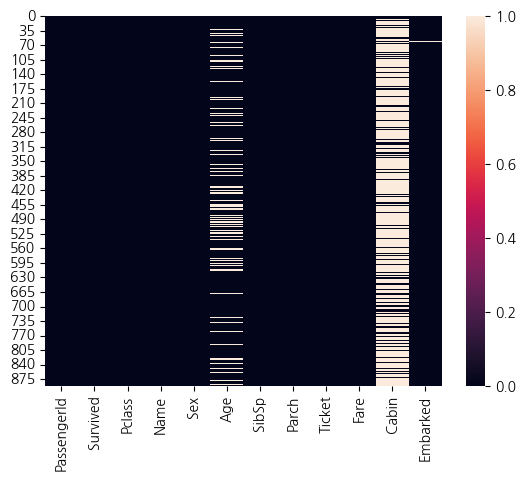

In [8]:
sns.heatmap(train.isnull())

In [11]:
temp = train.isnull().mean()
temp[temp!=0]

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

`Age`에서 20%, `Cabin`에서 77%, `Embarked`에서 0.002% 정도의 결측치가 존재함  
`Cabin`과 `Embarked`는 문자열 형식의 데이터로, 모델과 직접적인 영향을 미비할 것이라고 생각됨

### 생존자

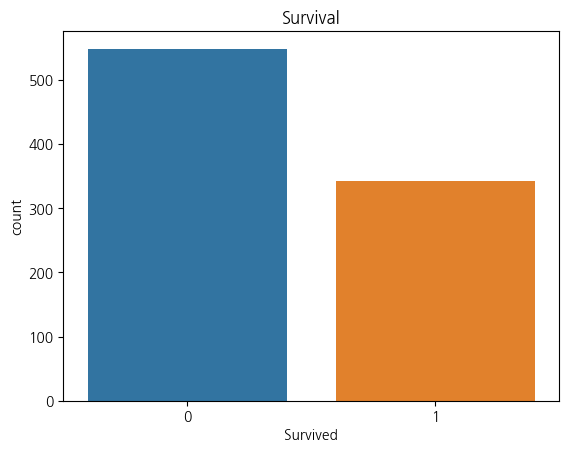

In [24]:
#countplot이란? -> 범주형 변수의 각 카테고리별로 데이터의 빈도를 시각화할 수 있다.
#예를 들어, 성별, 학력 수준, 지역, 직업 등과 같이 명목형 변수의 분포를 확인하고 싶을 때 사용할 수 있다.
_ = sns.countplot(data=train, x="Survived").set_title("Survival")

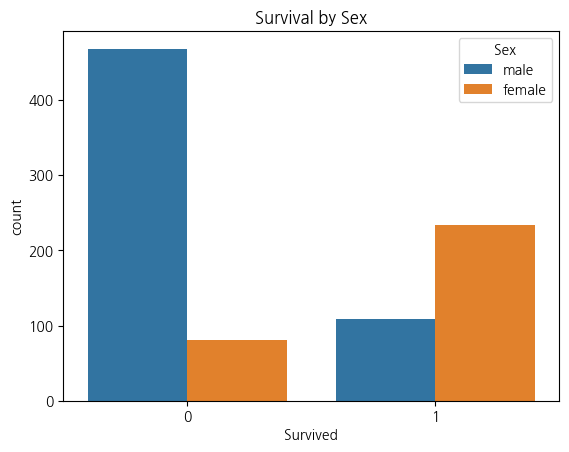

In [25]:
_ = sns.countplot(data=train, x="Survived", hue="Sex").set_title("Survival by Sex")

생존 여부와 성별의 연관성이 있을것으로 생각됨

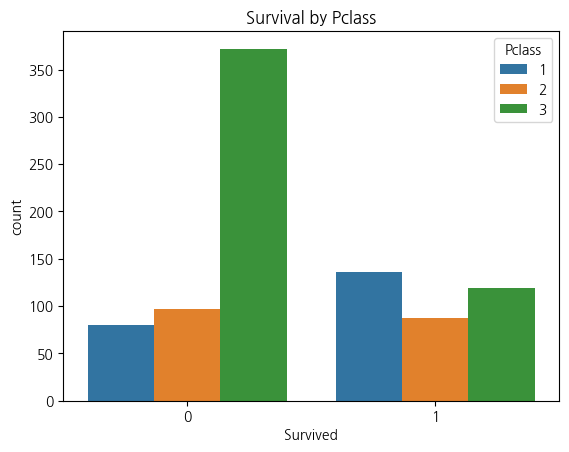

In [26]:
_ = sns.countplot(data=train,x='Survived',hue='Pclass').set_title("Survival by Pclass")

티켓 등급과 생존 여부도 어느정도 연광성이 있을것이라 생각됨

### Data Cleaning
#### Age

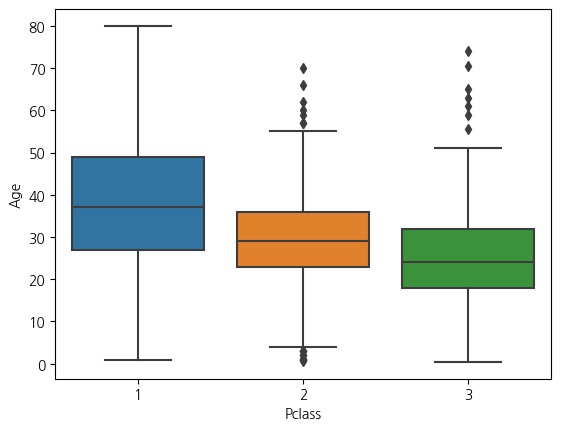

In [27]:
#boxplot이란? boxplot은 데이터의 분포와 이상치를 시각화하는데 사용되는 그래프이다.
#주어진 데이터의 중앙값, 사분위수, 최솟값, 최댓값 등을 표현하여 데이터의 전반적인 분포와 이상치를 한눈에 파악할 수 있다.

_ = sns.boxplot(data=train, x="Pclass", y="Age")

In [29]:
train.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


결측치가 있는 `Age`를 `Pclass`의 평균 나이값을 이용해 대채하는 방식이 굉장히 인상 깊었음  
일반적으로 평균이나 중앙값을 이용하는 방식이 아닌, 다른 변수를 이용해 좀 더 균등하게 결측치를 대체할 수 있는 방식이라고 생각됨

In [25]:
def age_pclass(cols):
    # TODO

In [26]:
train["Age"] = train[["Age", "Pclass"]].apply(age_pclass, axis=1)

#### Embarked
탑승지의 경우, 결측치의 양이 적고 크게 생존 여부와 큰 상관이 없을것 같으므로 임의로 채워줌

In [28]:
train["Embarked"] = train["Embarked"].  ('S')

#### Cabin
`Cabin`의 경우 열을 버려줌

In [33]:
train.  (columns='Cabin', axis=1, inplace=True)

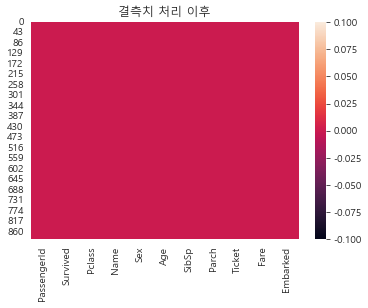

In [34]:
_ = sns.    (train.isnull()).set_title("결측치 처리 이후")

In [36]:
train.dropna(inplace=True)

#### 범주형 데이터 변환

범주형 데이터는 학습에서 바로 사용이 불가능하기 때문에 수치형으로 변환이 필요합니다.  
예를 들어, `Sex`의 경우 `Male=0`, `Female=1`과 같이 변환을 합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


현재 범주형 데이터는, `Name, Sex, Ticket, Embarked`가 있음

#### pd.get_dummies
학습 이전에 모든 데이터를 수치로 변환해주는 전처리 작업이 필요함  
1. 수치형 데이터로 변환
2. 수치화된 데이터를 가변수화

##### Note!!! - 가변수화
수치형 데이터로만 변환하면, **서로 간의 관계성**이 생기게 되어버림
- 월, 화, 수 ... -> 1, 2, 3 ...
- 1+2=3 / 월+화=수라는 관계성이 성립해버림

`pandas`의 `get_dummies` 함수는 원핫인코딩을 이용하는 방식  
`get_dummies(data=, prefix=, prefix_sep=, dummy_na=, columns=, drop_first=, dtype=)` 형식으로 존재함
- data: one-hot encoding을 적용할 데이터
- prefix: 생성할 더미 데이터(가변수화된 데이터)의 컬럼 prefix
- prefix_sep: `default='_'`
- dummpy_na: `NaN`도 포함시킬지, `default=False`
- columns: 대상 컬럼
- drop_first: k개의 범주를 k-1개로 가변수화할 경우 사용
- dtype: 새로운 columns의 데이터 타입

In [40]:
sex = pd.get_dummies(data=train["Sex"], drop_first=True)
embark = pd.get_dummies(data=train["Embarked"], drop_first=True)

In [45]:
# 가변수화된 컬럼으로 대체
train.drop(columns=["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
